Visualization Part 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Prepare the data for plotting

In [2]:
# Data from: https://www.kaggle.com/shivamb/netflix-shows
netflix_data = pd.read_csv('../Data/netflix_titles.csv')
netflix_data['year_added'] = netflix_data['date_added'].str.slice(start=-4)
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017


In [3]:
n_data_added = netflix_data.groupby(['year_added', 'type'], as_index=False).show_id.count()
n_data_added.columns = ['year_added', 'type', 'count']
n_data_added = n_data_added.pivot(index='year_added', columns='type', values='count').reset_index()
n_data_added.fillna(0, inplace = True)
n_data_added

type,year_added,Movie,TV Show
0,2008,1.0,1.0
1,2009,2.0,0.0
2,2010,1.0,0.0
3,2011,13.0,0.0
4,2012,4.0,3.0
5,2013,6.0,6.0
6,2014,19.0,6.0
7,2015,58.0,32.0
8,2016,264.0,192.0
9,2017,913.0,387.0


Bar Chart

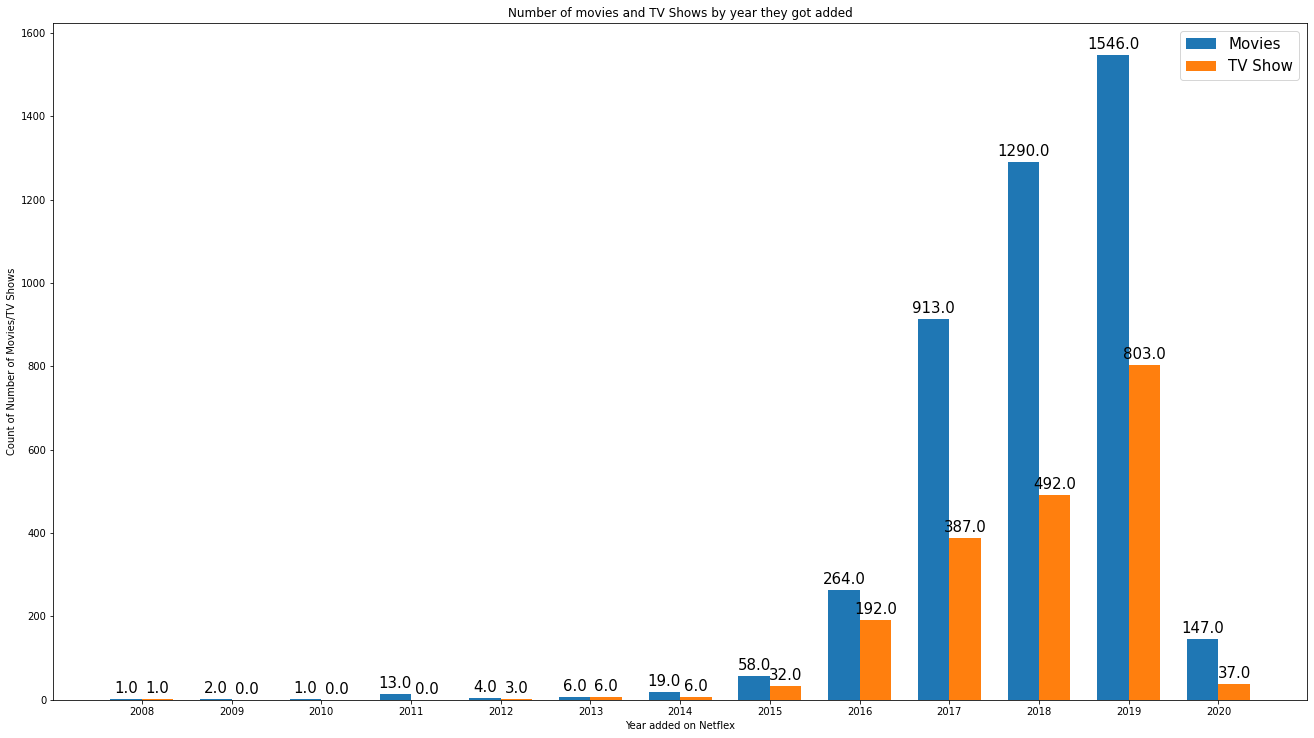

In [6]:
labels = n_data_added['year_added']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
Movies_rects = ax.bar(x - width/2, n_data_added['Movie'], width, label='Movies') # Add color here
TVshows_rects = ax.bar(x + width/2, n_data_added['TV Show'], width, label='TV Show')

# Add some text for labels, title, configure chart size
ax.set_xlabel('Year added on Netflex')
ax.set_ylabel('Count of Number of Movies/TV Shows')
ax.set_title('Number of movies and TV Shows by year they got added')
ax.set_xticks(x)
ax.set_xticklabels(labels)
fig.set_size_inches(18.5, 10.5)
plt.rcParams.update({'font.size': 15})
ax.legend()

 #Function to generate labels on top of the bars
def gen_label(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


gen_label(Movies_rects)
gen_label(TVshows_rects)

fig.tight_layout()



plt.show()

Horizontal Bar Chart

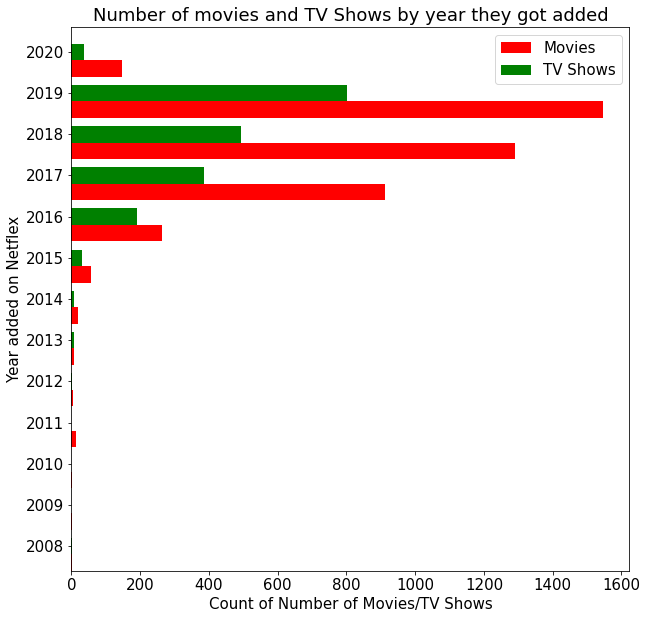

In [7]:

data = pd.DataFrame(dict(Year = n_data_added['year_added'],
                       Movie = n_data_added['Movie'], TVshow=n_data_added['TV Show'])) 

ind = np.arange(len(data))
width = 0.4

fig1, ax1 = plt.subplots()
ax1.barh(ind, data.Movie, width, color='red', label='Movies')
ax1.barh(ind + width, data.TVshow, width, color='green', label='TV Shows')

ax1.set(yticks=ind + width, yticklabels=data.Year, ylim=[2*width - 1, len(data)])

ax1.set_ylabel('Year added on Netflex')
ax1.set_xlabel('Count of Number of Movies/TV Shows')
ax1.set_title('Number of movies and TV Shows by year they got added')

ax1.legend()
fig1.set_size_inches(10, 10)
plt.show()


Stacked Bar Chart

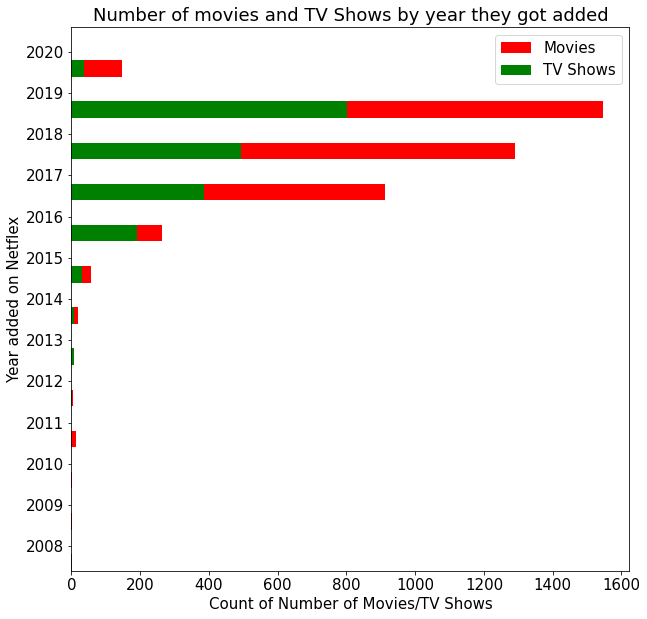

In [8]:

data = pd.DataFrame(dict(Year = n_data_added['year_added'],
                       Movie = n_data_added['Movie'], TVshow=n_data_added['TV Show'])) 

ind = np.arange(len(data))
width = 0.4

fig1, ax1 = plt.subplots()
ax1.barh(ind, data.Movie, width, color='red', label='Movies')
ax1.barh(ind, data.TVshow, width, color='green', label='TV Shows')

ax1.set(yticks=ind + width, yticklabels=data.Year, ylim=[2*width - 1, len(data)])

ax1.set_ylabel('Year added on Netflex')
ax1.set_xlabel('Count of Number of Movies/TV Shows')
ax1.set_title('Number of movies and TV Shows by year they got added')

ax1.legend()
fig1.set_size_inches(10, 10)
plt.show()


Pie Chart

In [9]:
n_data_added['Total'] = n_data_added['Movie'] + n_data_added['TV Show']
# To select last few rows only
n_data_added_flt = n_data_added[-4:]
n_data_added_flt = n_data_added_flt.reset_index(drop=True) # For resetting index
n_data_added_flt.head()

type,year_added,Movie,TV Show,Total
0,2017,913.0,387.0,1300.0
1,2018,1290.0,492.0,1782.0
2,2019,1546.0,803.0,2349.0
3,2020,147.0,37.0,184.0


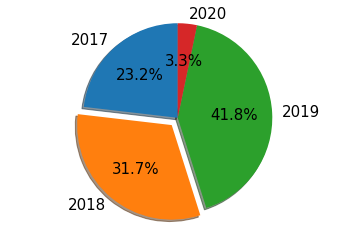

In [10]:
# Pie chart
labels = n_data_added_flt['year_added']
sizes = n_data_added_flt['Total']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice 

fig2, ax2 = plt.subplots()
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Modifying Pie Chart

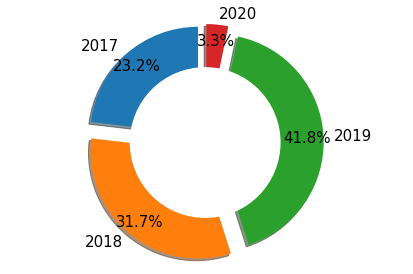

In [11]:
# Pie chart
labels = n_data_added_flt['year_added']
sizes = n_data_added_flt['Total']
explode = (0.1, 0.1, 0.1, 0.1)  # "explode" all the slices

fig2, ax2 = plt.subplots()
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=0.85) # Adjust font location

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()
plt.show()

Histogram

Text(0.5, 0, 'Random Data')

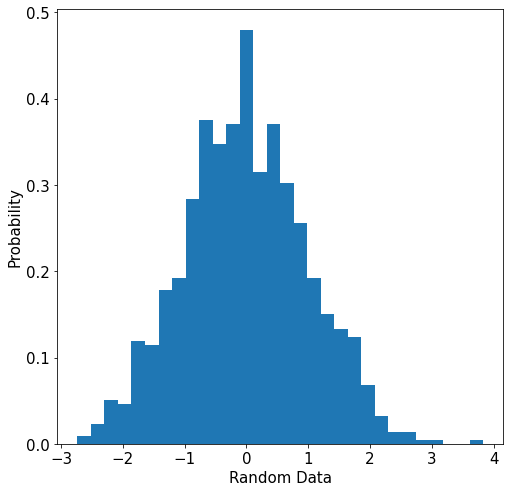

In [13]:
np.random.seed(421) # Use same seed to get the same set of values
x = np.random.normal(size=1000) # Generate random numbers
plt.figure(figsize=(8,8))
plt.hist(x, density=True, bins=30)  
plt.ylabel('Probability')
plt.xlabel('Random Data')

#### To Try
- Use the below datasets, modify the data as required and repeat all the chart covered today <br>
Datasets:<br>
https://www.kaggle.com/roshansharma/sanfranciso-crime-dataset<br>
https://www.kaggle.com/ronitf/heart-disease-uci